# Neutron Emitting Spot Size - Finding good experimental parameters

MCNP6 was used to find good conditions for the experimental investigation of the neutron emitting spot size. 

## MCNP 6 settings - investigation 02 & 03

### Geometry

- Target including coolant (water)
- Vacuum chamber
- Copper Faraday cage and lead shielding, each 1 mm thick
- Detector
    - St Gobain material definition
    - width and height is varied, but always the same value
    - depth is 2 cm
    - composition in MCNP6 according to the specifications from the supplier
    
    
- Tungsten attenuating edge
    - Distance between source and tungsten was 11.05 cm, this is the closest one could go with the geometry.
    - Tungsten thickness is varied
    - Tungsten height is computed so that 10% more of the solid angle subtended by the detector and the source is covered
    
    
- Height of all pieces is computed according to the formula: $H = 1.1 \cdot (tan(\alpha)\cdot L \cdot 2 + r)$
    - $\alpha$  : 1/2 the cone angle of neutron emission, i.e. 2°/2  = 1° 
    - L: distance between source and front face of object (i.e. vacuum chamber, tungsten piece, detector)
    - r: radius of the neutron emitting disk

### Source


- NPS = 1e5
- Cutoff is 0.1 MeV
- Neutron energy is 2.8 MeV
- Neutrons are emitted in a full cone angle of 2° 
- Source is a disk (with uniform probability profile, i.e. tophat)


### Studies

- Influence of nps
    - Case 1, 2 and 3: setting the nps to 1e5, 1e4, 1e6 and checking the entering tracks
    - Difference < 6% --> negligible
 
- Height of geometry
    - Case 4: height of geometry (target, vacuum chamber, tungsten, copper) 10 % larger than before
    - Differences < 1% --> negligible
 
- Neutron energy
    - Case 5, 6 and 7: neutron energy 2.7, 2.6 and 2.9 MeV
    - Differences < 1% --> negligible
 
- Cutoff energy
    - Case 8: cutoff energy to 0.69 MeV
    - Differences < 1% --> negligible
 
- Time duration
    - Case 9-128: average of 905 seconds = 15 min for 6 radii and 100 edge positions from -4 to 4 mm

## Calculation of the countrate in the detector

- Total reaction rate inside the detector volume per MCNP6 source particle:
$$R_{tot} = \int^{E_{max}}_{E_{min}} \Sigma_H(E) \cdot F4(E)\, dE \cdot V$$
    - $F4(E)$ F4 Tally fluence per center bin energy per source particle
    - $E_{max}$ maximum energy center bin value of the F4 tally and $E_{min}$ the minimal one
    - $\Sigma_H(E)$ (total) macroscopic cross section for hydrogen. This assumes that the carbon does not contribute to the detection of the neutron
    - $V$ the detector volume (taken as the volume of the scintillator)
    - note that the reaction rate density is computed as $R^{\prime\prime\prime} = \Sigma_H(E) \cdot F4(E)$
    
    
- correction for the fraction of neutrons emitted (in MCNP6 the neutrons are emitted only in a cone of angle 2 degree)
$$f = \frac{\int^{1^{\circ}}_{0} Y(\beta) d\beta}{\int^{180^{\circ}}_{0} Y(\beta) d\beta}$$
    - 1$^{\circ}$ is taken as half the emission angle because the yield curve Y is symmetric
    - Y is the relative neutron yield curve (that is normalized to 90 degrees) from Csikai for 100 keV deuterium beam


- Count rate $C$ in the detector can be computed using
$$C = S_0 \cdot f \cdot R_{tot}$$
    - $S_0$ is the total number of neutrons per second


- Taking the energy cutoff of the detector (0.7 MeV) into account
$$\epsilon_{cutoff} = 1 - (\frac{E_{cutoff}}{E_{neutron}})$$
    - Ask Robert why this is needed again! --> this is detailed in Conceptual design and optimization of a plastic scintillator array for 2D tomography using a compact D-D fast neutron generator
    - Ask Robert why he treated direct and indirect neutrons separetely
    - $E_{cutoff}$ is the energy cutoff of the SiPM (Roberts thesis) and is 0.7 MeV, which is the needed to discriminate X-rays
    - $E_{neutron}$ is the energy of the incoming neutron, assumed to be the 100 keV energy, so 2.8 MeV
    - The efficiency of the detector is taken into account in this way?
   
   
- Hence for the cutoff corrected countrate $C_{cutoff}$:

$$C_{cutoff} = S_0 \cdot \frac{\int^{1^{\circ}}_{0} Y(\beta) d\beta}{\int^{180^{\circ}}_{0} Y(\beta) d\beta} \cdot (1 - \left(\frac{E_{cutoff}}{E_{neutron}}\right)) \cdot \int^{E_{max}}_{E_{min}} \Sigma_H(E) \cdot F4(E)\, dE \cdot V$$




- note that the report file /Users/hkromer/02_PhD/04_Publiations/04_Reports/06_NeutronEmittingSpotSize/2018-05_EmittingSpotSizeMeasurement/2018-05-08_NESS_optimalGeometry.pdf refers to the measurement "investigation_02" in E:\10_Experiments\02_MCNP\neutron_emitting_spot\2_case_files\_investigation_02\noised_ESF_fit_plot on the local computer

# Find out which parameters were investigated in investigation 02

- 2 and 3 are investigations without misalignment, 4 through 10 are with different degree of misalignment

In [1]:
import pandas as pd
for inv in [2,3,4,5]:
    inv = '0' + str(inv)
    propfile = f'/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/01.FindingGoodParameters/df_properties.investigation{inv}.csv'

    df_prop = pd.read_csv(propfile, index_col=0)
    print(f'investigation: {inv}')
    print(df_prop.columns.tolist())
    print(f'unique detector widths and heights: {df_prop.W_det.unique()} mm')
    print(f'unique distances between detector and source: {df_prop.dist_det.unique()} cm')
    print(f'unique depth of tungsten piece: {df_prop.D_W.unique()} cm \n')

investigation: 02
['case', 'W_det', 'dist_det', 'D_W']
unique detector widths and heights: [0.2 0.3 0.4 0.5 0.6] mm
unique distances between detector and source: [30 40 50 60 70 80] cm
unique depth of tungsten piece: [0.1 0.2 0.3 0.4 0.5 0.8] cm 

investigation: 03
['case', 'W_det', 'dist_det', 'D_W']
unique detector widths and heights: [0.6 0.7 0.8 0.9 1. ] mm
unique distances between detector and source: [50] cm
unique depth of tungsten piece: [0.9 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  5. ] cm 

investigation: 04
['case', 'W_det', 'dist_det', 'D_W', 'det_misalign']
unique detector widths and heights: [0.4 0.6 0.8 1. ] mm
unique distances between detector and source: [30 40 50] cm
unique depth of tungsten piece: [0.25 0.5  1.   3.   5.  ] cm 

investigation: 05
['case', 'W_det', 'dist_det', 'D_W', 'D_det', 'det_misalign', 'edge_misalign']
unique detector widths and heights: [0.6] mm
unique distances between detector and source: [50] cm
unique depth of tungste

## Calculation of the ESF


- use of a logistic fermi function as fit to the ESF: <br>
Li, T. et al. Comparison of different analytical edge spread function models for MTF
calculation using curve-fitting. 74981H (2009). doi:10.1117/12.832793
$$f(x,a,b,c) = \frac{a}{1+\text{exp}\left[-\frac{x-b}{c}\right]}$$
$$\text{FWHM} = 3.53 \cdot c$$


- the full data from MCNP is taken and the logistic fermi function is fitted to the data

- then 2 times the FWHM is taken as the data range and another fit is done on this data. The fit is interpolated and 30 points are equally taken from the interpolation curve<br>
<img src='fit_fermi_to_data.png' width=30%></img>

## Poisson noising

- The measurement time t per position is taken from the total measurement time (fixed to 5 hours) divided by the number of points on the interpolated fit (30)
- The counts are computed for of the interpolated points of the fit
- For each position, N (total number of counts) is sampled from a poisson distribution that has a mean of the number of counts N at that edge position
- This is repeated 1000 times
- Each time a new ESF is fitted to the noised data
 
## Estimation of the FWHM seen by the detector

- from the above, for each ESF fitted on the noised data the FWHM is computed. The mean and standard deviation of each of the 1000 FWHM's is taken and recorded. For each of the diameters set in the MCNP input file, the corresponding FWHM seen by the detector is plotted (as the mean and standard deviation of the 1000 noised datapoints). A curve is fitted to this data and taken as the lookup table. The uncertainty in the FWHM seen by the detector is projected on the curve to estimate the uncertainty in the diameter of the disc set in MCNP. This is done for each diameter. 



### below is an example for investigation 02, case 26

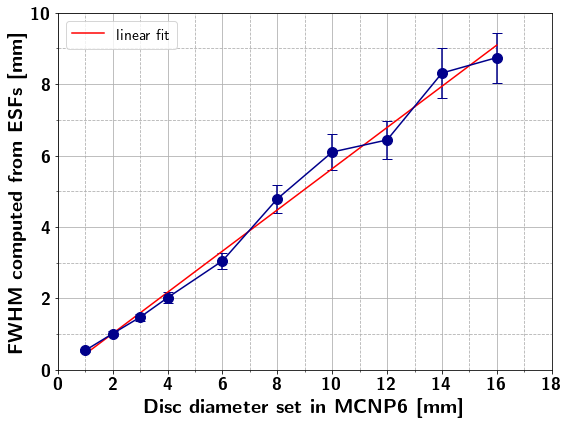

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

from scipy import stats

fname = '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/01.FindingGoodParameters/df_FWHM_mean_for_time_3_hrs.csv'
data = pd.read_csv(fname, index_col=0)


def fit_source_diam_VS_FWHM(X, Y):

    # linear least-squares regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    r_squared = r_value**2

    s = pd.Series([slope, intercept, r_squared], index = ['slope', 'intercept', 'r_squared'])
    # print(s)
    return s

case_data = data[ data['case'] == 26 ]
X = case_data['diameter'].values
Y = case_data['FWHM_mean'].values
Y_err = case_data['std'].values

# fit linear curve
slope, intercept, r_squared = fit_source_diam_VS_FWHM(X, Y)

# plot
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
fs = 20
markersize = 10
outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/DetailedNeutronGeneratorCharacterization/Figures/emitting_spot_size_finding_parameters/'
figname = 'esf_lookup_table_example'

ax1.errorbar(X, Y, yerr=Y_err, marker='o', color='darkblue', capsize=5, markersize=markersize)
ax1.plot(X, intercept + slope*X, 'r', label=r'linear fit')

plt.xlabel(r'\textbf{Disc diameter set in MCNP6 [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{FWHM computed from ESFs [mm]}', fontsize=fs)

# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)

ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params('y', colors='black', labelsize=fs-2)

ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')

plt.ylim(0,10)
plt.xlim(0,18)
plt.xticks(np.arange(0,20,2))
plt.legend(fontsize=fs-4, loc='best')
plt.tight_layout()
plt.savefig(f'{outputfolder}/{figname}.pdf')
plt.show()

## Uncertainty in estimated disc diameter versus detector width and height

- only detector widths between 0.2 and 0.6 cm are considered

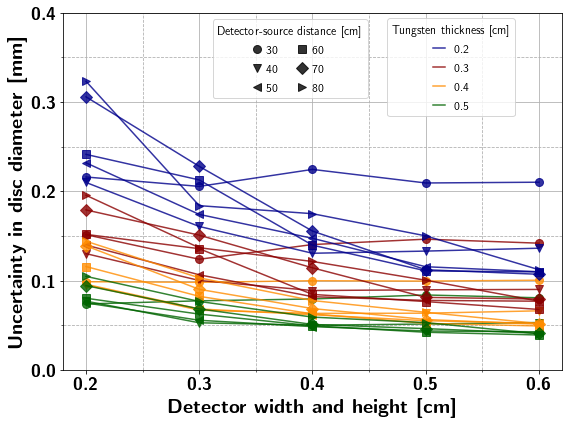

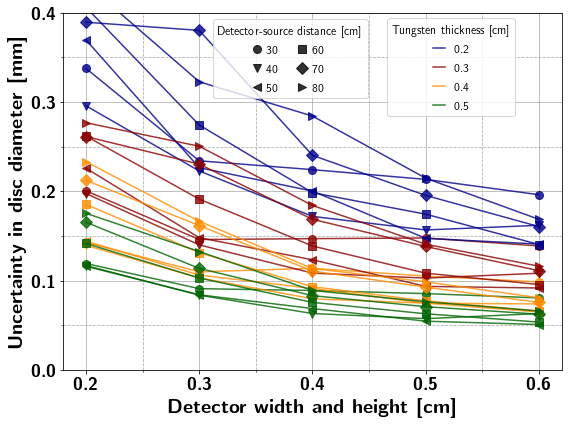

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

fname = '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/01.FindingGoodParameters/df_COMBINED_inv02_inv_03_error_MCNP_diameter_for_time_5_h.csv'
# diameter: diameter of disc set in MCNP in mm
# error_diameter: estimated uncertainty in that diameter from MCNP estimated by the lookup table in mm
# W_det: width and height of the detector in cm 
# dist_det: distance between detector front face and the source in cm
# D_W: depth of the tungsten piece in cm


diams = [2,3]
for diam in diams:
    data = pd.read_csv(fname, index_col=0)
    data = data[ (data['D_W'] > 0.1) & (data['D_W'] < 0.6) & (data['diameter'] == diam) ]
    # data = data[ (data['D_W'] > 0.1)  & (data['diameter'] == 2) ]

    markers = ['o', 'v', '<', 's', 'D', '>'] 
    colors = ['darkblue', 'darkred', 'darkorange', 'darkgreen']
    lst_dist_det = data['dist_det'].unique()
    lst_W_det = data['W_det'].unique()
    lst_D_W = data['D_W'].unique()

    # plot
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(1, 1, 1)
    fs = 20
    markersize = 8
    outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/DetailedNeutronGeneratorCharacterization/Figures/emitting_spot_size_finding_parameters/'
    figname = f'unvertainty_vs_det_W_and_H_diameter_{diam}'
    handles = []  # legend handles to change color of legend

    # markers are different detector distances
    # colors are different tungsten widths
    for dist_det, marker in zip(lst_dist_det, markers):
        for D_W, color in zip(lst_D_W, colors):
            this_data = data[ (data['D_W'] == D_W) & (data['dist_det'] == dist_det)]
            X = this_data['W_det'].values
            Y = this_data['error_diameter'].values
            _, = ax1.plot(X, Y, marker=marker, markersize=markersize, label=D_W, color=color, alpha=0.8)
            handles.append(copy.copy(_))

    plt.ylabel(r'\textbf{Uncertainty in disc diameter [mm]}', fontsize=fs)
    plt.xlabel(r'\textbf{Detector width and height [cm]}', fontsize=fs)

    # minor ticks x
    minor_locator = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator)
    # minor ticks y
    minor_locator = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator)

    ax1.tick_params('x', colors='black', labelsize=fs-2)
    ax1.tick_params('y', colors='black', labelsize=fs-2)

    ax1.grid(b=True, which='major', linestyle='-')
    ax1.grid(b=True, which='minor', linestyle='--')


    # plt.xlim(0,18)
    plt.yticks(np.arange(0,0.5,0.1))
    plt.xticks(np.arange(0.2,0.7,0.1))
    plt.ylim(0,0.4)
    # legend
    # legend for the tungsten thickness
    my_handles, my_labels = ax1.get_legend_handles_labels()
    # my_handles = [my_handles[1], my_handles[0], my_handles[3], my_handles[2]]
    # my_labels = [my_labels[1], my_labels[0], my_labels[3], my_labels[2]]
    l1 = plt.legend(my_handles[0:4], my_labels[0:4], loc=(0.65, 0.71), markerscale=0, fontsize=12, handlelength=1)
    l1.set_title(r"Tungsten thickness [cm]", prop = {'size': 12})
    # change color of legend
    for h in handles:
        h.set_color("black")
    l2 = plt.legend(handles[0::4], list(lst_dist_det), loc=(0.30, 0.76), handlelength=0, fontsize=12, ncol=2)
    l2.set_title(r"Detector-source distance [cm]", prop = {'size': 12})
    plt.gca().add_artist(l1)

    plt.tight_layout()
    plt.savefig(f'{outputfolder}/{figname}.pdf')
    plt.show()

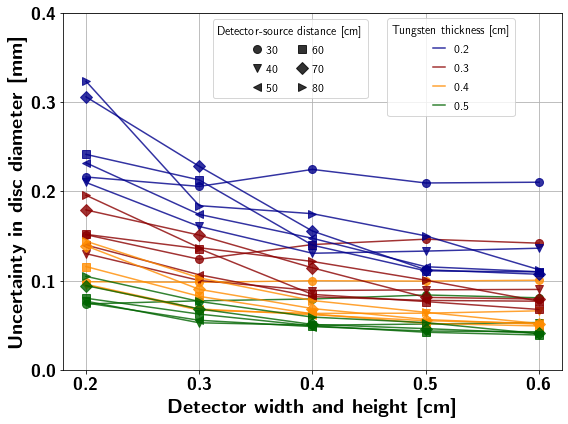

- From those two plots (2 and 3 mm) the final **detector width and height is chosen to 0.5 cm**

## Uncertainty in estimated disc diameter versus distance detector to source

- only detector widths between 0.2 and 0.6 cm are considered

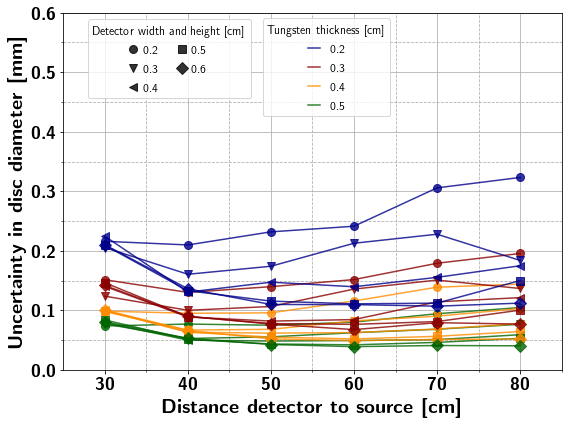

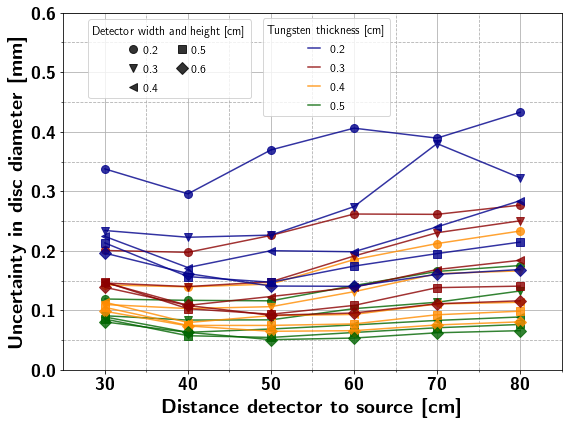

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy
# from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

fname = '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/01.FindingGoodParameters/df_COMBINED_inv02_inv_03_error_MCNP_diameter_for_time_5_h.csv'
# diameter: diameter of disc set in MCNP in mm
# error_diameter: estimated uncertainty in that diameter from MCNP estimated by the lookup table in mm
# W_det: width and height of the detector in cm 
# dist_det: distance between detector front face and the source in cm
# D_W: depth of the tungsten piece in cm
diams = [2,3]
for diam in diams:
    data = pd.read_csv(fname, index_col=0)

    data = data[ (data['D_W'] > 0.1) & (data['D_W'] < 0.6) & (data['diameter'] == diam) ]
    # data = data[ (data['D_W'] > 0.1)  & (data['diameter'] == 2) ]

    markers = ['o', 'v', '<', 's', 'D', '>'] 
    colors = ['darkblue', 'darkred', 'darkorange', 'darkgreen']
    lst_dist_det = data['dist_det'].unique()
    lst_W_det = data['W_det'].unique()
    lst_D_W = data['D_W'].unique()

    # plot
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(1, 1, 1)
    fs = 20
    markersize = 8
    outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/DetailedNeutronGeneratorCharacterization/Figures/emitting_spot_size_finding_parameters/'
    figname = f'unvertainty_vs_dist_detector_source_{diam}'
    handles = []  # legend handles to change color of legend

    # markers are different detector width and heights
    # colors are different tungsten thicknesses
    for W_det, marker in zip(lst_W_det, markers):
        for D_W, color in zip(lst_D_W, colors):
            this_data = data[ (data['D_W'] == D_W) & (data['W_det'] == W_det)]
            X = this_data['dist_det'].values
            Y = this_data['error_diameter'].values
            _, = ax1.plot(X, Y, marker=marker, markersize=markersize, label=W_det, color=color, alpha=0.8)
            handles.append(copy.copy(_))

    plt.ylabel(r'\textbf{Uncertainty in disc diameter [mm]}', fontsize=fs)
    plt.xlabel(r'\textbf{Distance detector to source [cm]}', fontsize=fs)

    # minor ticks x
    minor_locator = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator)
    # minor ticks y
    minor_locator = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator)

    ax1.tick_params('x', colors='black', labelsize=fs-2)
    ax1.tick_params('y', colors='black', labelsize=fs-2)

    ax1.grid(b=True, which='major', linestyle='-')
    ax1.grid(b=True, which='minor', linestyle='--')


    # plt.xlim(0,18)
    plt.yticks(np.arange(0,0.7,0.1))
    plt.xticks(np.arange(30,100,10))
    plt.ylim(0,0.6)
    plt.xlim(25,85)
    # legend
    # legend for the tungsten thickness
    my_handles, my_labels = ax1.get_legend_handles_labels()
    # my_handles = [my_handles[1], my_handles[0], my_handles[3], my_handles[2]]
    # my_labels = [my_labels[1], my_labels[0], my_labels[3], my_labels[2]]

    l1 = plt.legend(my_handles[0::5], my_labels[0::5], loc=(0.4, 0.71), markerscale=0, fontsize=12, handlelength=1)
    # l1 = plt.legend(loc=(0.65, 0.71), markerscale=0, fontsize=12, handlelength=1)

    l1.set_title(r"Tungsten thickness [cm]", prop = {'size': 12})
    # change color of legend
    for h in handles:
        h.set_color("black")
    l2 = plt.legend(handles[0::4], list(lst_W_det), loc=(0.05, 0.76), handlelength=0, fontsize=12, ncol=2)
    l2.set_title(r"Detector width and height [cm]", prop = {'size': 12})
    plt.gca().add_artist(l1)

    plt.tight_layout()
    plt.savefig(f'{outputfolder}/{figname}.pdf')
    plt.show()

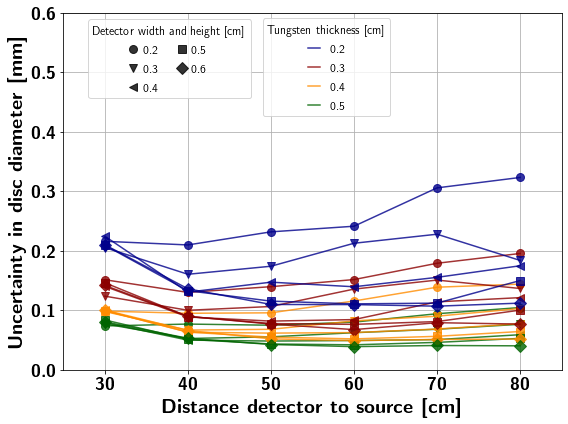

In [263]:
plt.show()

- From those two plots (3 and 2 mm) the **distance between detector and source is chosen to 60 cm** (diminishing returns)

In [237]:
lst_D_W

array([0.2, 0.3, 0.4, 0.5])

In [238]:
lst_W_det

array([0.2, 0.3, 0.4, 0.5, 0.6])

## Uncertainty in estimated disc diameter versus tungsten thickness

- distance detector to source is fixed to 50 cm

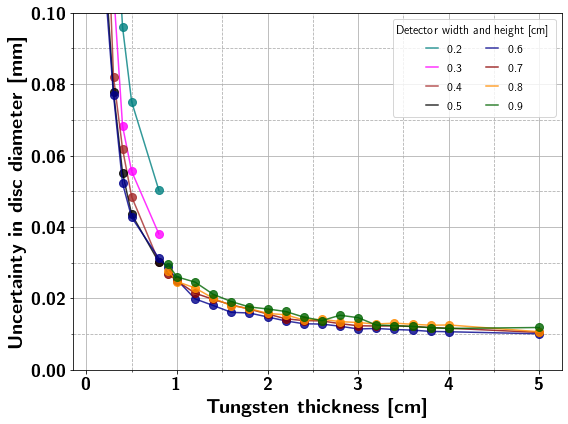

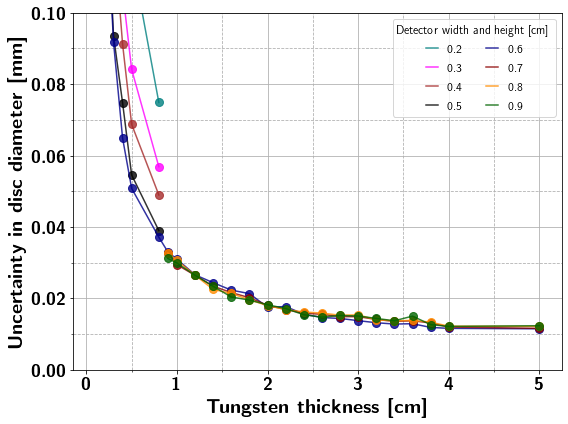

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

fname = '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/01.FindingGoodParameters/df_COMBINED_inv02_inv_03_error_MCNP_diameter_for_time_5_h.csv'
# diameter: diameter of disc set in MCNP in mm
# error_diameter: estimated uncertainty in that diameter from MCNP estimated by the lookup table in mm
# W_det: width and height of the detector in cm 
# dist_det: distance between detector front face and the source in cm
# D_W: depth of the tungsten piece in cm
diams = [2,3]
for diam in diams:
    data = pd.read_csv(fname, index_col=0)

    data = data[ (data['diameter'] == diam) & (data['dist_det'] == 50) ]
    # data = data[ (data['diameter'] == diam)]



    markers = ['o', 'v', '<', 's', 'D', '>'] 
    colors = ['teal', 'magenta', 'brown', 'black', 'darkblue', 'darkred', 'darkorange', 'darkgreen']
    lst_dist_det = data['dist_det'].unique()
    lst_W_det = data['W_det'].unique()
    lst_D_W = data['D_W'].unique()

    # plot
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(1, 1, 1)
    fs = 20
    markersize = 8

    outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/DetailedNeutronGeneratorCharacterization/Figures/emitting_spot_size_finding_parameters/'
    figname = f'unvertainty_vs_W_thickness_diameter_{diam}'

    # markers are different detector distances
    # colors are different detector width and heights
    for dist_det, marker in zip(lst_dist_det, markers):
        for W_det, color in zip(lst_W_det, colors):
            this_data = data[ (data['W_det'] == W_det) & (data['dist_det'] == dist_det)]
            X = this_data['D_W'].values
            Y = this_data['error_diameter'].values
            _, = ax1.plot(X, Y, marker=marker, markersize=markersize, label=W_det, color=color, alpha=0.8)
            handles.append(copy.copy(_))

    plt.ylabel(r'\textbf{Uncertainty in disc diameter [mm]}', fontsize=fs)
    plt.xlabel(r'\textbf{Tungsten thickness [cm]}', fontsize=fs)

    # minor ticks x
    minor_locator = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator)
    # minor ticks y
    minor_locator = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator)

    ax1.tick_params('x', colors='black', labelsize=fs-2)
    ax1.tick_params('y', colors='black', labelsize=fs-2)

    ax1.grid(b=True, which='major', linestyle='-')
    ax1.grid(b=True, which='minor', linestyle='--')


    # plt.xlim(0,1)
    plt.yticks(np.arange(0,0.14,0.02))
    # plt.xticks(np.arange(0.5,6,0.5))
    plt.ylim(0,0.10)

    # legend
    # legend for the tungsten thickness
    # my_handles, my_labels = ax1.get_legend_handles_labels()
    # my_handles = [my_handles[1], my_handles[0], my_handles[3], my_handles[2]]
    # my_labels = [my_labels[1], my_labels[0], my_labels[3], my_labels[2]]
    # l1 = plt.legend(my_handles[0:4], my_labels[0:4], loc=(0.65, 0.71), markerscale=0, fontsize=12, handlelength=1)
    l1 = plt.legend(loc='best', markerscale=0, fontsize=12, handlelength=1, ncol=2)

    l1.set_title(r"Detector width and height [cm]", prop = {'size': 12})
    # # change color of legend
    # for h in handles:
    #     h.set_color("black")
    # l2 = plt.legend(handles[0::4], list(lst_dist_det), loc=(0.30, 0.76), handlelength=0, fontsize=12, ncol=2)
    # l2.set_title(r"Detector-source distance [cm]", prop = {'size': 12})
    # plt.gca().add_artist(l1)

    plt.tight_layout()
    plt.savefig(f'{outputfolder}/{figname}.pdf')
    plt.show()

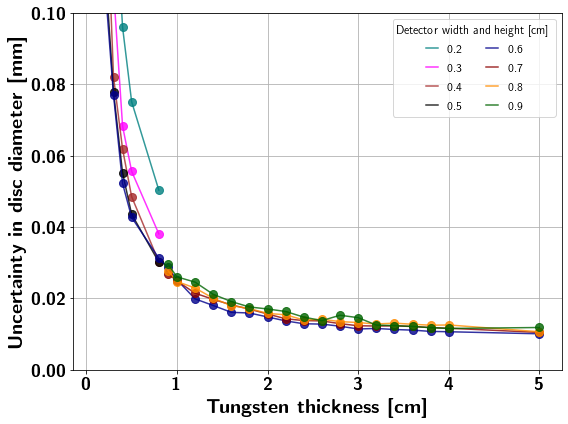

- From the two above (3 and 2 mm) the **final tungsten thickness is chosen to 2 cm** (diminishing returns, thicker means heavier)

In [279]:
lst_dist_det 

array([50])

In [176]:
lst_W_det, len(lst_W_det)

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 9)

In [280]:
fname = '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/01.FindingGoodParameters/df_COMBINED_inv02_inv_03_error_MCNP_diameter_for_time_5_h.csv'
# diameter: diameter of disc set in MCNP in mm
# error_diameter: estimated uncertainty in that diameter from MCNP estimated by the lookup table in mm
# W_det: width and height of the detector in cm 
# dist_det: distance between detector front face and the source in cm
# D_W: depth of the tungsten piece in cm
data = pd.read_csv(fname, index_col=0)

In [281]:
data.head()

,case,level_1,diameter,error_diameter,W_det,dist_det,D_W
0,inv02-0,0,1.0,0.401831,0.2,30,0.1
1,inv02-0,1,2.0,0.481837,0.2,30,0.1
2,inv02-0,2,3.0,0.634016,0.2,30,0.1
3,inv02-0,3,4.0,0.755524,0.2,30,0.1
4,inv02-0,4,6.0,1.306980,0.2,30,0.1
